<a href="https://colab.research.google.com/github/Chenuli05/CustomerChurn/blob/main/Churn_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 25) #to display all columns

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

#Basic Exploratory Data Analysis

In [64]:
#size of the dataset(rows, columns)
df.shape

(7043, 21)

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
#to see the data type of each column
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
#summary of the numeric data cols

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [69]:
df.nunique()# number of unique values for each feature

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [70]:
# consistent naming of features
df = df.rename(columns={'gender':'Gender','tenure':'Tenure' })
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

In [71]:
df.isna().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


No missing values found

In [72]:
df.duplicated().sum()

np.int64(0)

In [73]:
df.loc[df.duplicated()]


,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No duplicate rows

In [74]:
#no predictive value for customer ID - dropping column
df = df.drop(['customerID'], axis=1).copy() #dropping single column
df.head()


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.shape #new df


(7043, 20)

Checking unknown values (blanks)

In [76]:
for column in df.select_dtypes(include='object').columns:
    empty_strings_count = (df[column] == ' ').sum() + (df[column] == '').sum()
    if empty_strings_count > 0:
        print({column}, {empty_strings_count})

{'TotalCharges'} {np.int64(11)}


converting total charges which is an object to a numeric value

In [77]:
df ['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [78]:
df['TotalCharges'].isna().sum()
df[df['TotalCharges'].isna()]


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


After converting to numerical values, we can see that there are null values in TotalCharges column. These columns must be dropped.

In [79]:
df = df.dropna()#drop all na values(which are in total charges column)
df.shape
df[df['TotalCharges'].isna()]
df.isna().sum()


,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#Feature Understanding

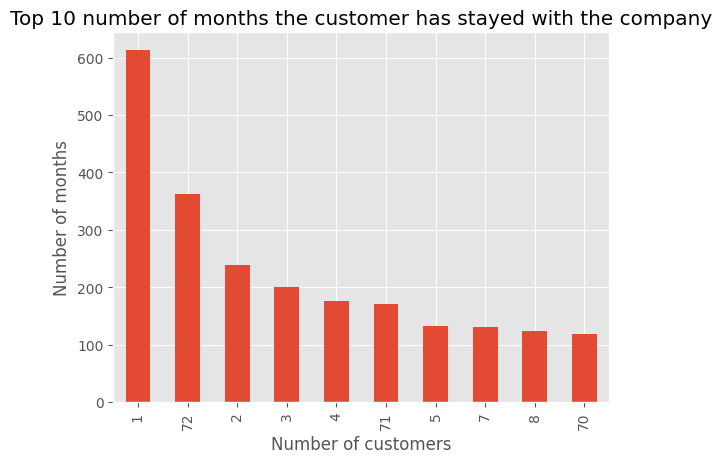

In [80]:
ax = df['Tenure'].value_counts().head(10)\
.plot(kind='bar', title='Top 10 number of months the customer has stayed with the company')
ax.set(xlabel='Number of customers', ylabel='Number of months')
plt.show()

<Axes: ylabel='Density'>

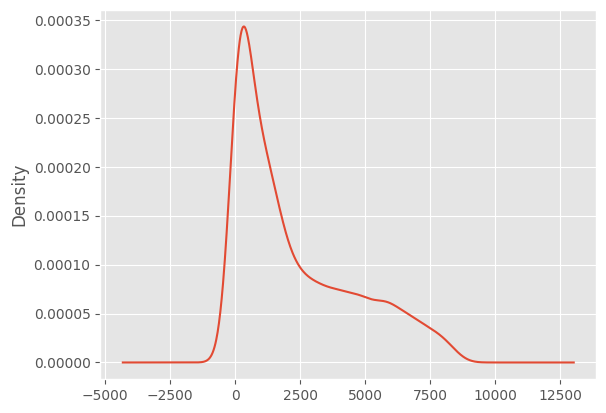

In [81]:
df['TotalCharges'].plot(kind='kde')

Feature Relationships

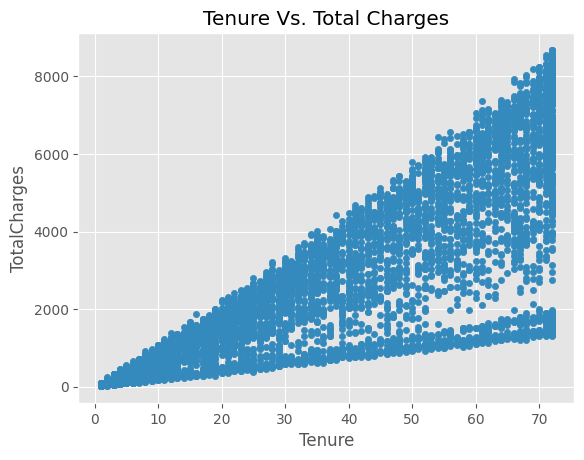

In [82]:
df.plot(kind='scatter', x='Tenure', y='TotalCharges', title='Tenure Vs. Total Charges')
plt.show()

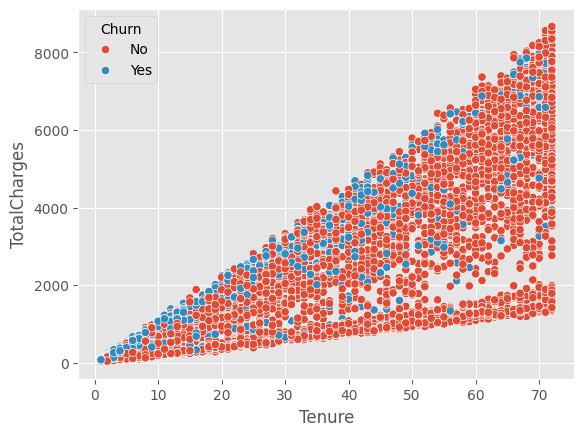

In [83]:
sns.scatterplot(x='Tenure', y='TotalCharges', data= df, hue='Churn')
plt.show()

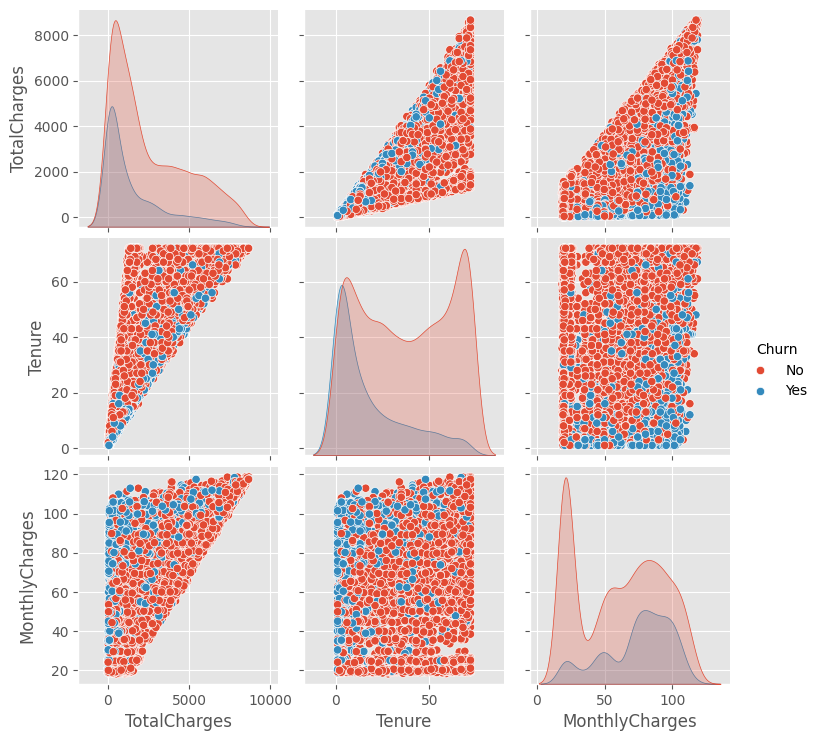

In [84]:
sns.pairplot(df, vars= ['TotalCharges','Tenure','MonthlyCharges'], hue='Churn')
plt.show()

In [129]:
df[['Tenure','MonthlyCharges', 'TotalCharges']].describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [133]:
df[['TotalCharges','Tenure','MonthlyCharges']].corr()

,TotalCharges,Tenure,MonthlyCharges
TotalCharges,1.000000,0.825880,0.651065
Tenure,0.825880,1.000000,0.246862
MonthlyCharges,0.651065,0.246862,1.000000


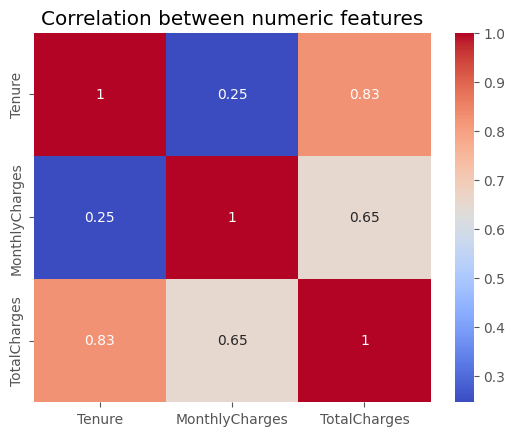

In [137]:
plt.figure()
sns.heatmap(df[['Tenure','MonthlyCharges', 'TotalCharges']].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation between numeric features')
plt.show()

In [88]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


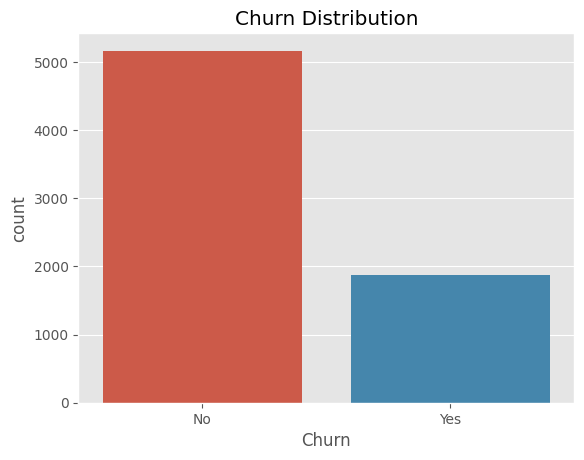

In [141]:
sns.countplot(data=df, x='Churn', hue = 'Churn')
plt.title("Churn Distribution")
plt.show()

In [135]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


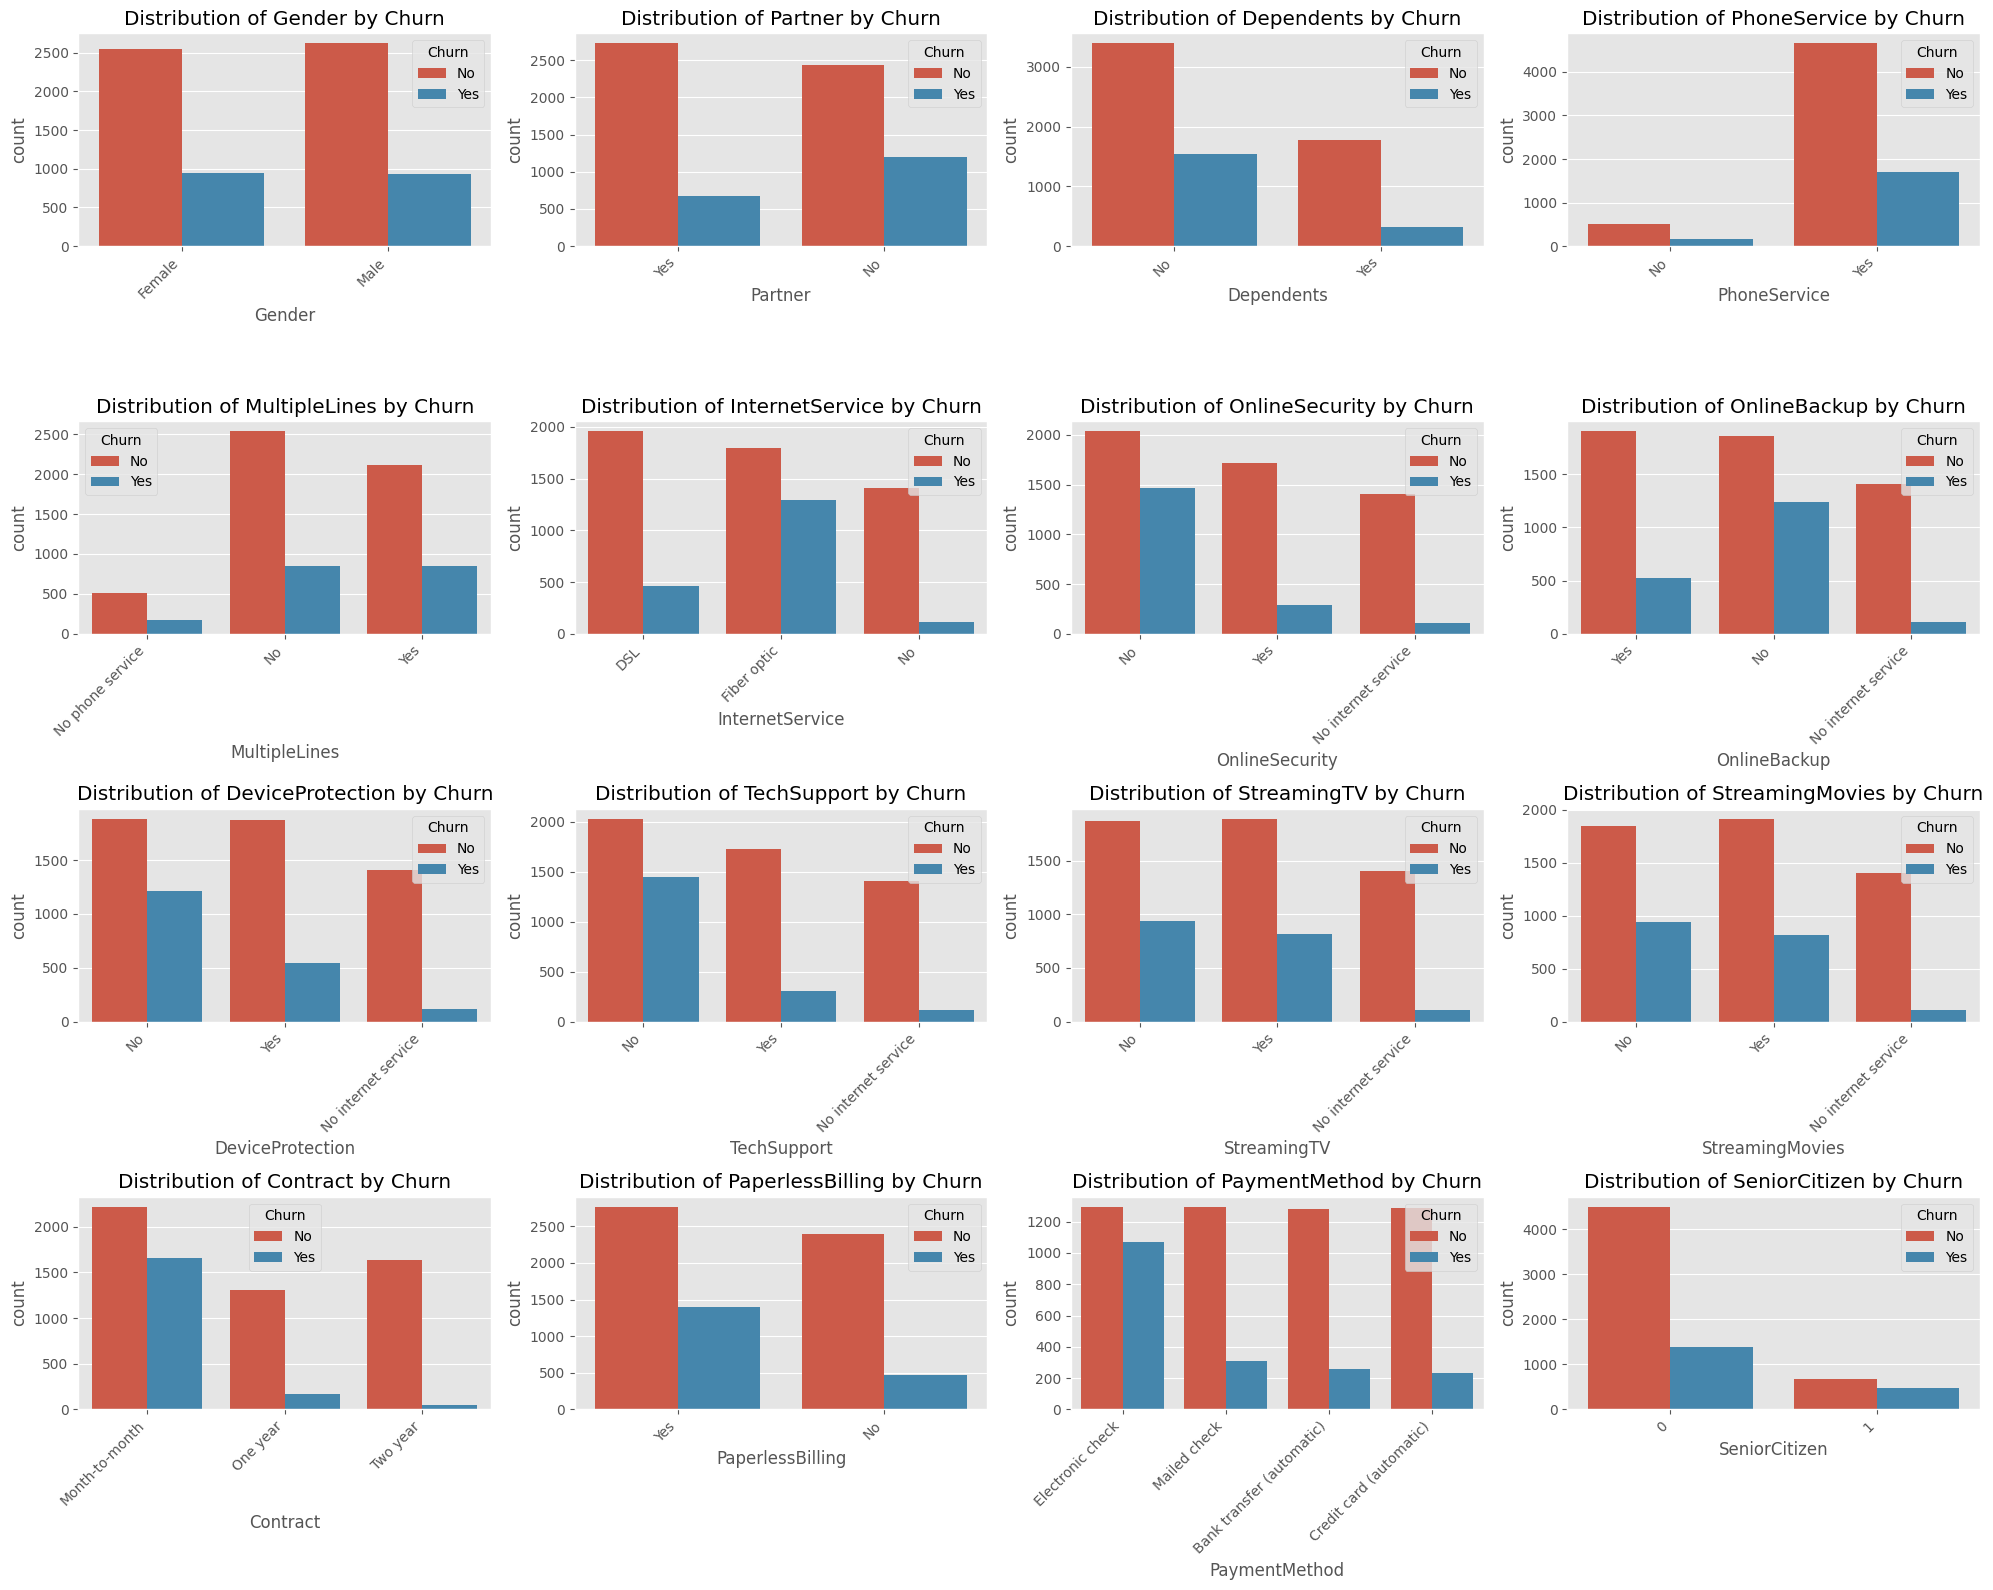

In [134]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.append('SeniorCitizen') # Include SeniorCitizen as a categorical feature
categorical_cols.remove('Churn') # Exclude Churn from being plotted against itself

# Determine grid dimensions
num_cols = len(categorical_cols)
n_rows = (num_cols + 3) // 4  # Calculate number of rows, roughly 4 columns per row
n_cols = 4

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size dynamically

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1) # Create subplots in a grid
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

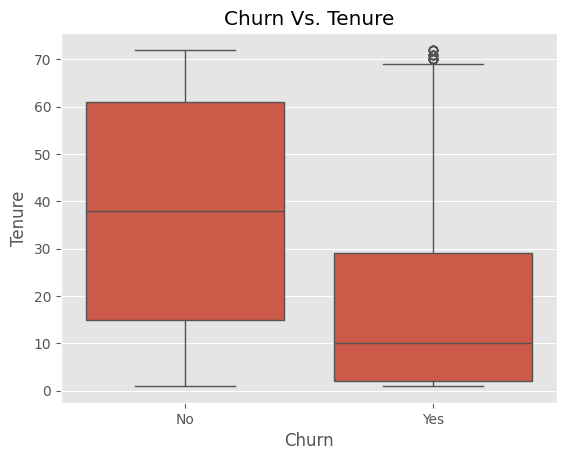

In [91]:
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title("Churn Vs. Tenure")
plt.show()

Customers with low tenure are likely to churn.

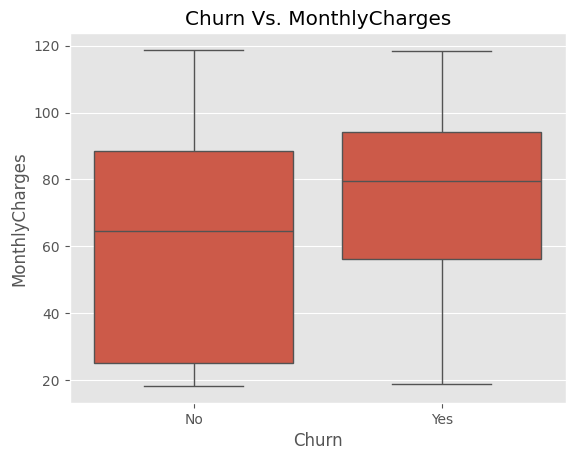

In [124]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Churn Vs. MonthlyCharges")
plt.show()

Cutomers with higher monthly chargers are likely to churn

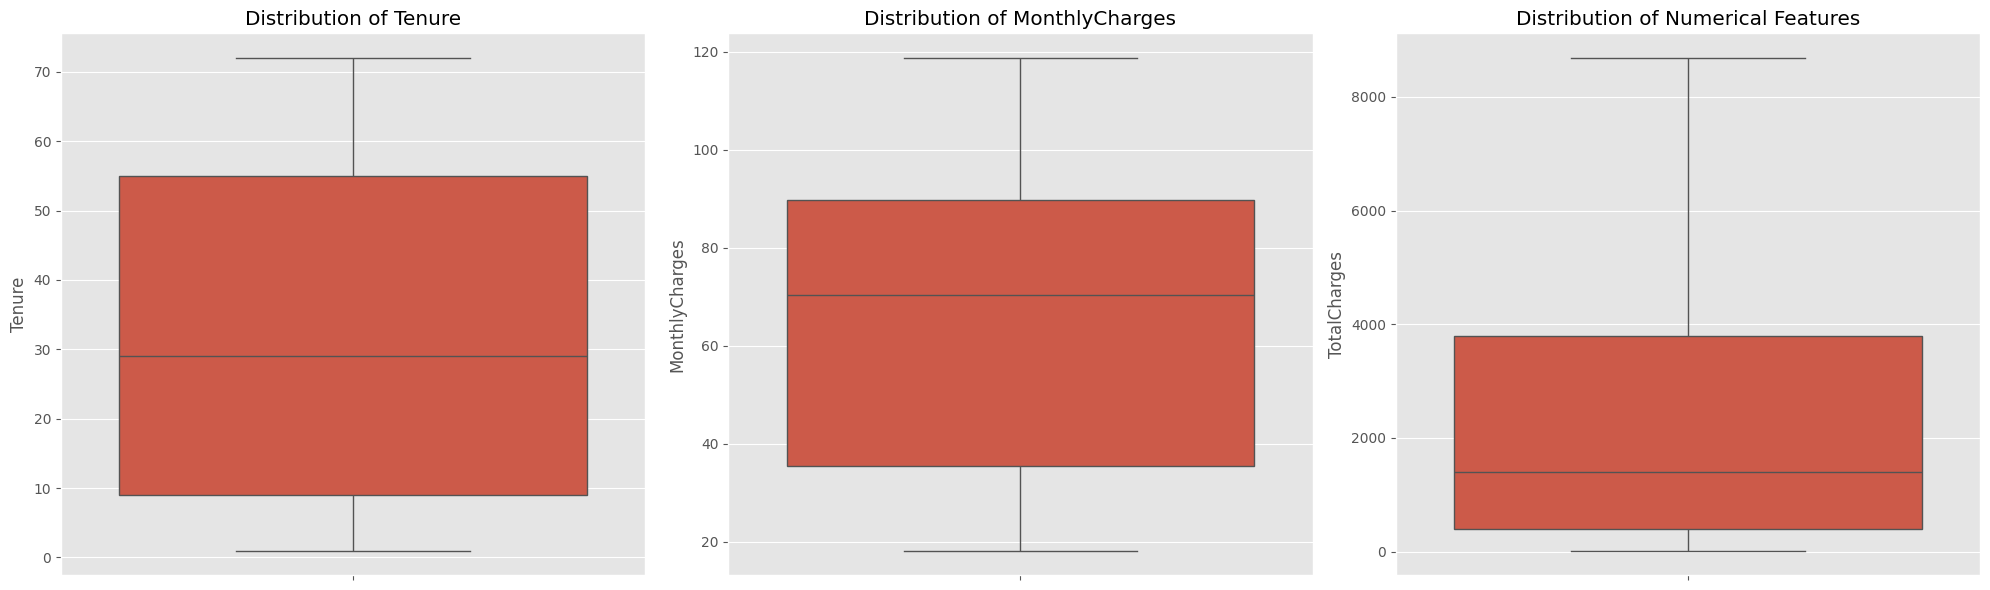

In [138]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 6)) # Adjust figure size to accommodate multiple plots in a row
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1) # Create subplots in one row
    sns.boxplot(data=df, y=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

No outliers detected

Checking if dataset is balanced

In [94]:
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.421502
Yes,26.578498


Dataset it clearly inbalnaced significantly but

In [95]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
outliers_data = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_data[col] = outliers
    outliers

    print(f"\n--- Outliers in {col} ---")
    if not outliers.empty:
        display(outliers[['Gender', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']])
        print(f"Number of outliers in {col}: {len(outliers)}")
    else:
        print(f"No outliers found in {col} based on the IQR method.")


--- Outliers in Tenure ---
No outliers found in Tenure based on the IQR method.

--- Outliers in MonthlyCharges ---
No outliers found in MonthlyCharges based on the IQR method.

--- Outliers in TotalCharges ---
No outliers found in TotalCharges based on the IQR method.


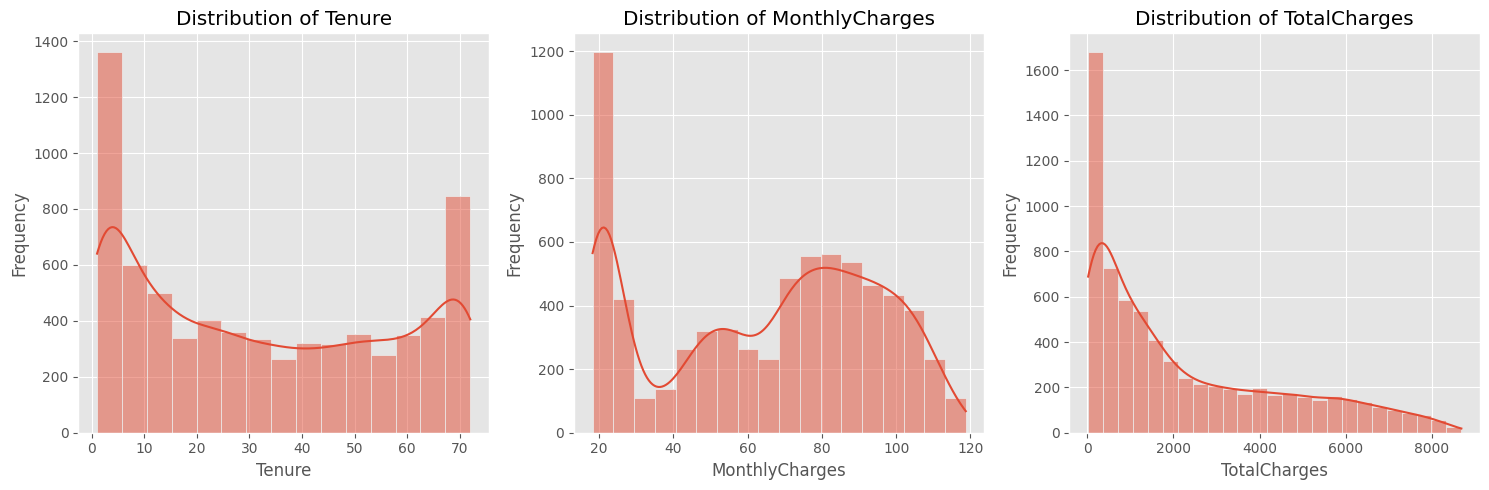

In [139]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5)) # Adjust figure size to accommodate multiple plots

for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1) # Create subplots in one row
    sns.histplot(df[col], kde=True) # Use histplot for density and histogram
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Full Preprocessing

In [99]:
from sklearn.preprocessing import LabelEncoder
df_numeric = df.copy()
label = LabelEncoder()
for col in df_numeric.select_dtypes(include=['object']).columns: #iterates through all object columns
  df_numeric[col] = label.fit_transform(df_numeric[col])

df_numeric.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Now that all values have been converted to numeric values, the correlation between all values can be observed.

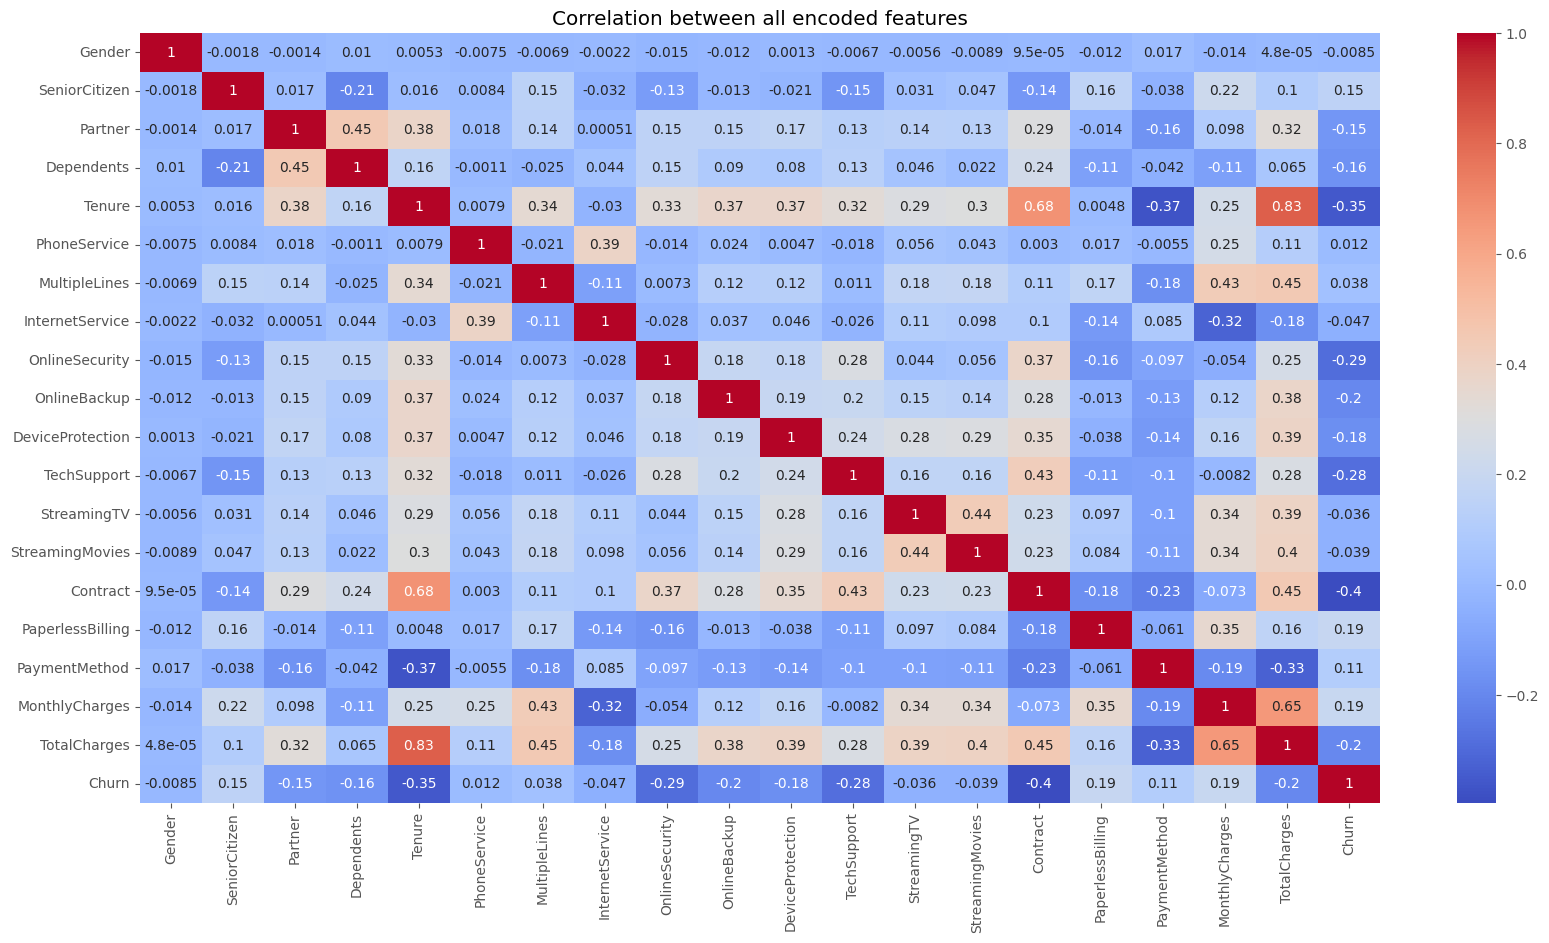

In [100]:
plt.figure(figsize=(20,10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation between all encoded features')
plt.show()

In [101]:
#resetting the index after dropping rows
df_numeric= df_numeric.reset_index(drop=True)
df_numeric.head()


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [102]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [103]:
df_encoded = pd.get_dummies(df,columns=cat_cols, drop_first=True)
df_encoded.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True,False,True


In [104]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.280248,-1.161694,-0.994194,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True,False,False
1,0,0.064303,-0.260878,-0.173740,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False
2,0,-1.239504,-0.363923,-0.959649,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,True,True
3,0,0.512486,-0.747850,-0.195248,True,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True,False,True


In [105]:
df_encoded =df_encoded.reset_index(drop=True)
df_encoded.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.280248,-1.161694,-0.994194,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True,False,False
1,0,0.064303,-0.260878,-0.173740,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False
2,0,-1.239504,-0.363923,-0.959649,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,True,True
3,0,0.512486,-0.747850,-0.195248,True,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True,False,True


#Modelling
splitting into train and test data

###For Neural Networks

In [106]:
from os import XATTR_CREATE
from sklearn.model_selection import train_test_split

x = df_encoded.drop(['Churn_Yes'], axis=1)
y = df_encoded['Churn_Yes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5625, 30), (1407, 30), (5625,), (1407,))

Dividing into layers

In [107]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

#3 layer neural network
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],))) #hidden layer 1
model.add(layers.Dense(16, activation='relu')) #hidden layer 2
model.add(layers.Dense(1, activation='sigmoid')) #output layer(churn probability)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#testing accuracy while training

In [109]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6955 - loss: 0.5528 - val_accuracy: 0.8000 - val_loss: 0.4252
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7905 - loss: 0.4381 - val_accuracy: 0.7991 - val_loss: 0.4109
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4199 - val_accuracy: 0.8027 - val_loss: 0.4072
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8013 - loss: 0.4142 - val_accuracy: 0.8000 - val_loss: 0.4100
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.4187 - val_accuracy: 0.8062 - val_loss: 0.4081
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7938 - loss: 0.4238 - val_accuracy: 0.8000 - val_loss: 0.4082
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8066 - loss: 0.4130 - val_accuracy: 0.7973 - val_loss: 0.4073
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8122 - loss: 0.4123 - val_accuracy: 0.

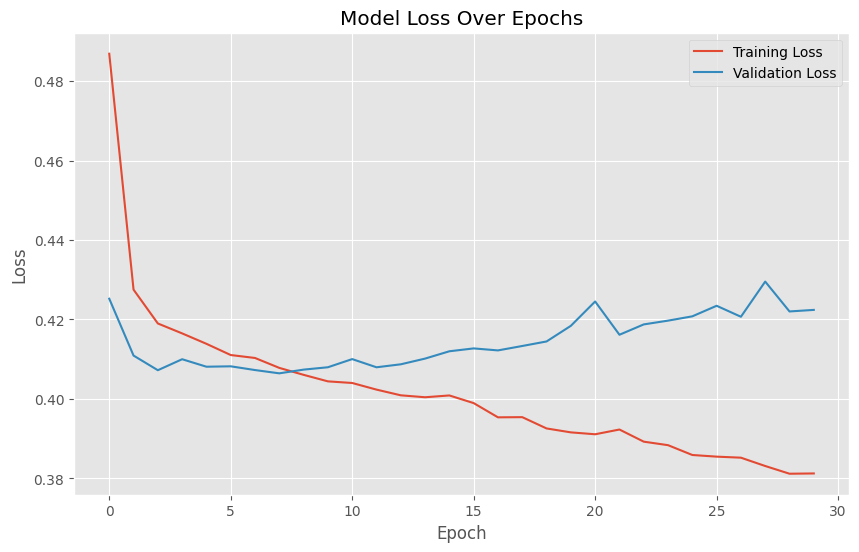

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Predicting if churn or not with ANN

In [111]:
nn_preds= (model.predict(x_test)>0.5).astype(int)
#if its greater than .5 it'll be a churn

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


For Decision tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3,5,7,10, None], 'min_samples_split': [2,5,10], #testing many version od decision trees(dt)
    'criterion': ['gini', 'entropy']}

#cv=5 for 5 fold cross validation
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1') #pciks the best based on f1 score
grid_dt.fit(x_train, y_train)

best_dt = grid_dt.best_estimator_
best_dt

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [114]:
dt_preds= best_dt.predict(x_test)
dt_preds

array([False,  True, False, ..., False, False, False])

###Evaluating and comparing the models

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluation_table(y_test, preds, model_name):
    data = {
        "Model": [model_name],
        "Accuracy": [accuracy_score(y_test, preds)],
        "Precision": [precision_score(y_test, preds)],
        "Recall": [recall_score(y_test, preds)],
        "F1 Score": [f1_score(y_test, preds)]
    }
    return pd.DataFrame(data)

In [116]:
nn_results =evaluation_table(y_test, nn_preds,'Neural Network')
dt_results = evaluation_table(y_test, dt_preds, 'Decision Tree')

In [117]:
results = pd.concat([nn_results, dt_results], axis=0)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Neural Network,0.795309,0.628743,0.561497,0.593220
0,Decision Tree,0.751955,0.528868,0.612299,0.567534


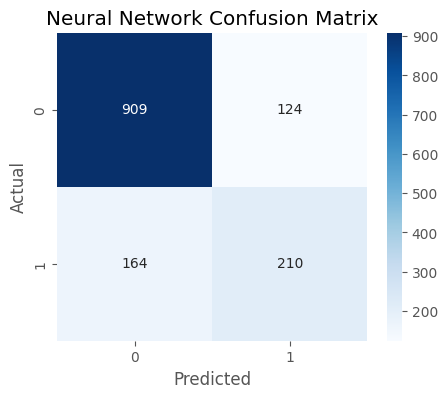

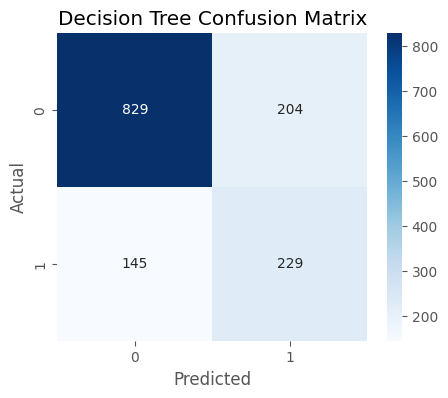

In [118]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plot_conf_matrix(y_test, nn_preds, "Neural Network Confusion Matrix")
plot_conf_matrix(y_test, dt_preds, "Decision Tree Confusion Matrix")

In [119]:
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Decision Tree":
     [accuracy_score(y_test, dt_preds),
        precision_score(y_test, dt_preds),
        recall_score(y_test, dt_preds),
        f1_score(y_test, dt_preds)],
    "Neural Network":
     [accuracy_score(y_test, nn_preds),
        precision_score(y_test, nn_preds),
        recall_score(y_test, nn_preds),
        f1_score(y_test, nn_preds)]})

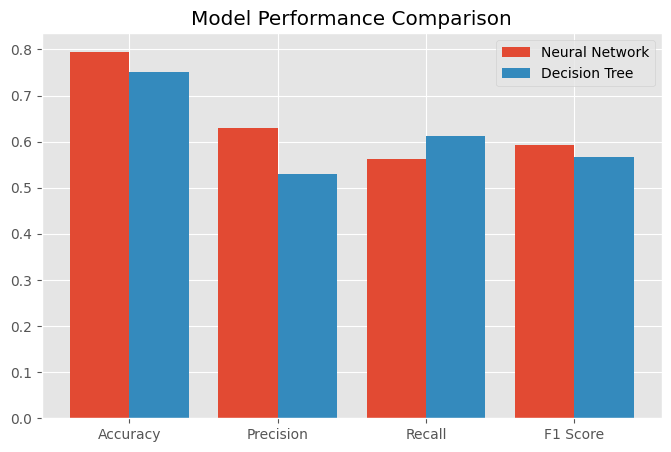

In [120]:
metrics = comparison["Metric"]
nn_scores = comparison["Neural Network"]
dt_scores = comparison["Decision Tree"]


plt.figure(figsize=(8,5))
x = range(len(metrics))
plt.bar(x, nn_scores, width=0.4, label="Neural Network")
plt.bar([p + 0.4 for p in x], dt_scores, width=0.4, label="Decision Tree")
plt.xticks([p + 0.2 for p in x], metrics)
plt.title("Model Performance Comparison")
plt.legend()
plt.show()
